# Pymaceuticals Inc.
---

### Analysis


The study involved 248 mice diagnosed with SCC tumors, which received various drug regimens over a period of 45 days. The primary objective was to evaluate the efficacy of Capomulin, Pymaceuticals' drug of interest, compared to other treatment regimens.

* Drug Regimens: The study examined the performance of multiple drug regimens, including Capomulin, Ramicane, Infubinol, and Ceftamin. Tumor volumes at the last timepoint were monitored as key indicators of treatment effectiveness.

* Sex Distribution: The study had a relatively balanced distribution of male and female mice, allowing for gender-specific analyses if necessary.

* Treatment Efficacy: Capomulin and Ramicane emerged as promising treatments for SCC, demonstrating a significant reduction in tumor volume over the course of the study. In contrast, Infubinol and Ceftamin showed less favourable outcomes, with slower tumor volume reduction or even tumor growth observed.

* Outlier Analysis: Infubinol treatment showed potential outliers in tumor volume, indicating variability in treatment response among individual mice. This suggests that there may be a subset of mice in the group that respond particularly well to the treatment, exhibiting smaller tumor volumes compared to the rest of the group.

* Correlation Analysis: There was a strong positive correlation between mouse weight and tumor volume among mice treated with Capomulin, suggesting that heavier mice tended to have larger tumors.

Overall, the study findings highlight the promising potential of Capomulin and Ramicane as effective treatments for SCC, emphasising the importance of further research and development in this area. These results will serve as valuable insights for Pymaceuticals' ongoing efforts in developing anti-cancer medications. 

In [105]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")
combined_data = combined_data[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)']]

# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [106]:
# Checking the number of mice.
num_mice = combined_data['Mouse ID'].nunique()

num_mice

249

In [107]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mice_ids = duplicate_mice['Mouse ID'].unique()

duplicate_mice_ids

array(['g989'], dtype=object)

In [108]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = combined_data[combined_data['Mouse ID'].isin(duplicate_mice_ids)]

duplicate_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [109]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data[combined_data['Mouse ID'] != 'g989']

clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [110]:
# Checking the number of mice in the clean DataFrame.
num_mice_clean = clean_data['Mouse ID'].nunique()

num_mice_clean

248

## Summary Statistics

In [111]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

summary_stats = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats = summary_stats.rename(columns={'mean': 'Mean Tumor Volume', 
                                              'median': 'Median Tumor Volume', 
                                              'var': 'Tumor Volume Variance', 
                                              'std': 'Tumor Volume Std. Dev.', 
                                              'sem': 'Tumor Volume Std. Err.'})

summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [112]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = clean_data.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})

summary_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

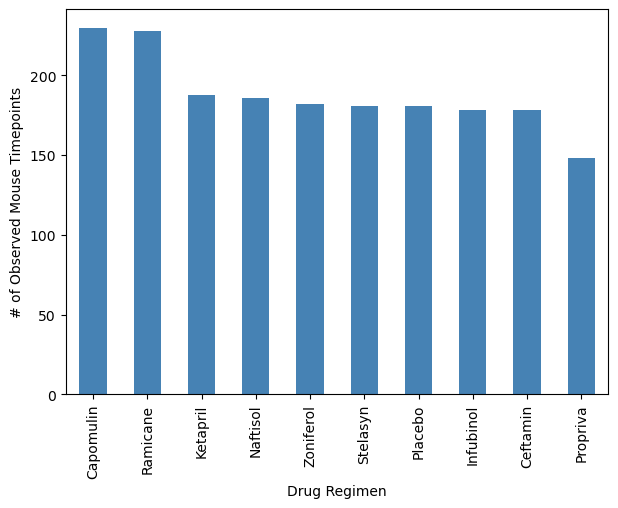

In [113]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_counts = clean_data['Drug Regimen'].value_counts()

# Convert value counts series into a DataFrame
df = pd.DataFrame({'Drug Regimen': drug_regimen_counts.index, '# of Observed Mouse Timepoints': drug_regimen_counts.values})

# Plot the bar chart using Pandas
ax = df.plot(kind='bar', x='Drug Regimen', y='# of Observed Mouse Timepoints', figsize=(7, 5), color='steelblue', legend=False)

# Set the labels
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('# of Observed Mouse Timepoints')

# Rotate x-axis labels vertically
ax.set_xticklabels(df['Drug Regimen'], rotation='vertical')

# Show the plot
plt.show()

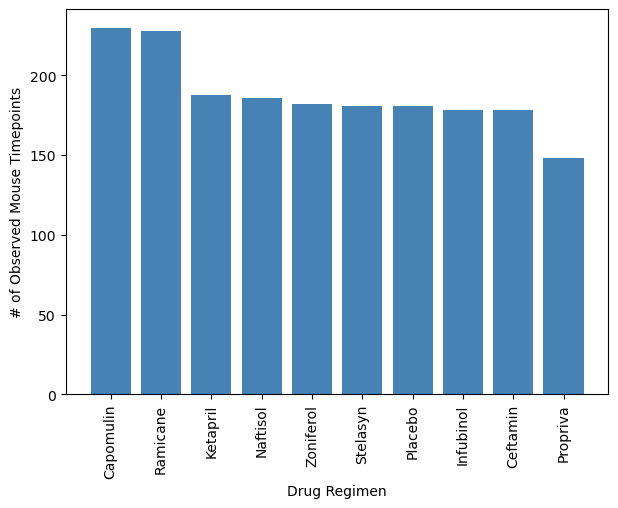

In [114]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimen_counts = clean_data['Drug Regimen'].value_counts()

# Create a bar plot
plt.figure(figsize=(7, 5))
plt.bar(drug_regimen_counts.index, drug_regimen_counts, color='steelblue')

# Set the title and labels
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

# Rotate x-axis labels vertically
plt.xticks(rotation='vertical')

# Show the plot
plt.show()

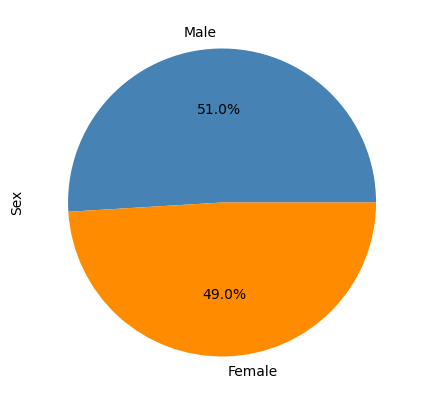

In [115]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_counts = clean_data['Sex'].value_counts()

def custom_format(pct):
    if pct >= 0.5:
        return '{:.0f}.0%'.format(pct)
    else:
        return '{:.1f}%'.format(pct)

ax = gender_counts.plot(kind='pie', figsize=(5, 5), autopct=custom_format, startangle=0, colors=['steelblue', 'darkorange'])

ax.set_aspect('equal')
ax.set_ylabel('Sex')

plt.show()

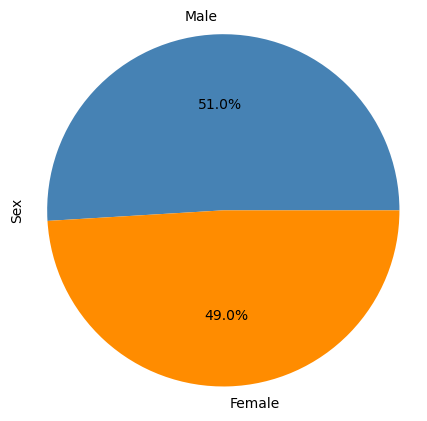

In [116]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_counts = clean_data['Sex'].value_counts()

def custom_format(pct):
    if pct >= 0.5:
        return '{:.0f}.0%'.format(pct)
    else:
        return '{:.1f}%'.format(pct)


plt.figure(figsize=(5, 5))
plt.pie(gender_counts, labels=gender_counts.index, autopct=custom_format, startangle=0, colors=['steelblue', 'darkorange'])
plt.axis('equal')  
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [117]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

# Step 1: Create a grouped DataFrame showing the last time point for each mouse
last_timepoints = clean_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Step 2: Merge the grouped DataFrame with the original cleaned DataFrame
merged_data = pd.merge(last_timepoints, clean_data, on=['Mouse ID', 'Timepoint'], how='inner')

# Display the merged DataFrame
merged_data



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [118]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds

# Step 1: Create a list that holds the treatment names and an empty list to hold the tumor volume data
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_volume_data = []

# Step 2: Loop through each drug in the treatment list
for treatment in treatments:
    # Locate the rows in the merged DataFrame that correspond to each treatment
    tumor_volumes = merged_data.loc[merged_data['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Append the resulting final tumor volumes for each drug to the empty list
    tumor_volume_data.append(tumor_volumes)

# Step 3: Determine outliers using the upper and lower bounds, and then print the results
for i, treatment in enumerate(treatments):
    quartiles = tumor_volume_data[i].quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    
    # Identify potential outliers
    potential_outliers = tumor_volume_data[i].loc[(tumor_volume_data[i] < lower_bound) | (tumor_volume_data[i] > upper_bound)]
    
   # Print the results
    if potential_outliers.empty:
        print(f"{treatment}'s potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)")
    else:
        print(f"{treatment}'s potential outliers:", potential_outliers)

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


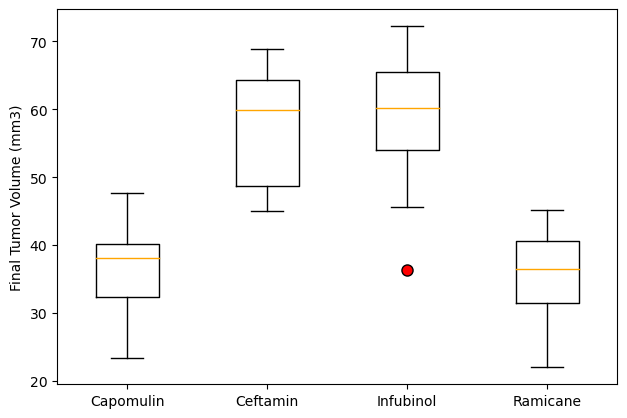

In [119]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# Filter the merged_data DataFrame to include only the specified drug regimens
filtered_data = merged_data[merged_data['Drug Regimen'].isin(treatments)]

# Generate box plot
ax = filtered_data.boxplot(column='Tumor Volume (mm3)', by='Drug Regimen', figsize=(7, 5), grid=False, color=dict(boxes='black', whiskers='black', medians='orange', caps='black'), flierprops=dict(marker='o', markerfacecolor='red', markersize=8))

# Set y-axis label
ax.set_ylabel('Final Tumor Volume (mm3)')

# Remove the x-axis label
ax.set_xlabel('')

# Remove the default title
plt.suptitle('')
plt.title('')

# Display the plot
plt.show()


## Line and Scatter Plots

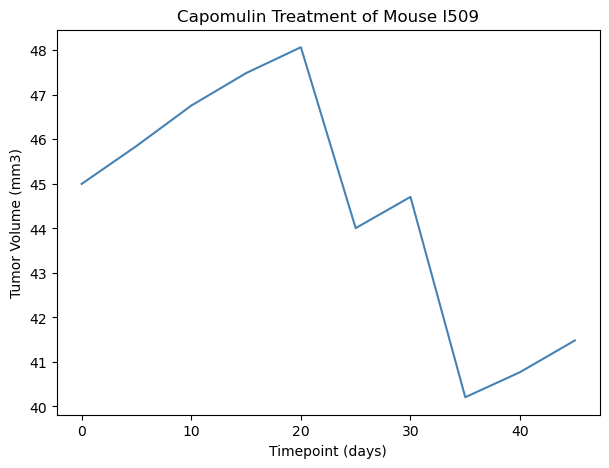

In [120]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Filter the data for the mouse treated with Capomulin
capomulin_data = clean_data[clean_data['Drug Regimen'] == 'Capomulin']

# Filter data for mouse I509
mouse_data = capomulin_data[capomulin_data['Mouse ID'] == 'l509']

# Generate the line plot
plt.figure(figsize=(7,5))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], color='steelblue')

# Add labels and title
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Treatment of Mouse I509')

# Remove grid
plt.grid(False)

# Show plot
plt.show()


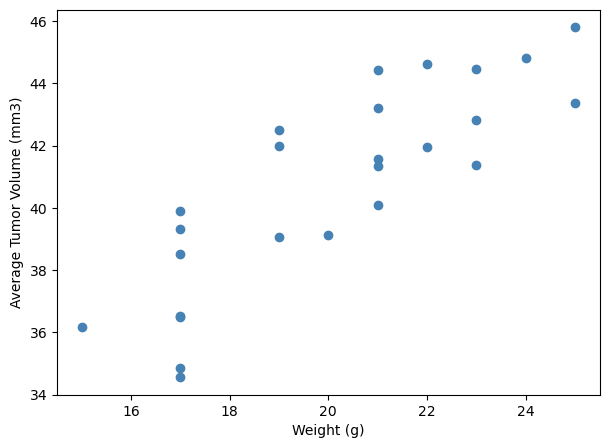

In [121]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Filter the data for the Capomulin regimen
capomulin_data = clean_data[clean_data['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Get the corresponding weight for each mouse
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

# Generate the scatter plot
plt.figure(figsize=(7,5))
plt.scatter(mouse_weight, average_tumor_volume, color='steelblue')

# Add labels and title
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Remove grid
plt.grid(False)

# Show plot
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


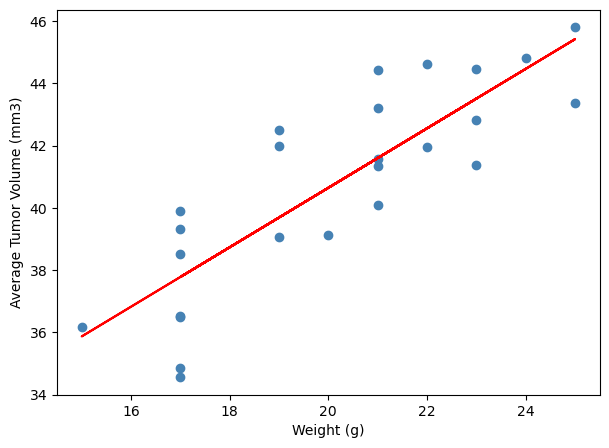

In [122]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation_coefficient, _ = st.pearsonr(mouse_weight, average_tumor_volume)
slope, intercept, _, _, _ = st.linregress(mouse_weight, average_tumor_volume)

# Generate the scatter plot
plt.figure(figsize=(7, 5))
plt.scatter(mouse_weight, average_tumor_volume, color='steelblue')

# Plot the linear regression line
plt.plot(mouse_weight, slope * mouse_weight + intercept, color='red')

# Add labels
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Remove grid
plt.grid(False)

# Print correlation coefficient
print(f"The correlation between mouse weight and the average tumor volume is {correlation_coefficient:.2f}")

# Show plot
plt.show()